## Deep learning with Keras: Chest accelerometer data

Dataset from https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer

In [1]:
# Set a seed for reproducibility
import numpy as np
seed = 42
np.random.seed(seed)

In [2]:
import keras

Using TensorFlow backend.


In [3]:
iris = np.load("data/iris_data.npy")
iris_labels = np.load("data/iris_labels.npy")

In [4]:
iris

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [5]:
iris_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from keras.utils import to_categorical

In [7]:
iris_onehot = to_categorical(iris_labels)
iris_onehot

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10, activation="sigmoid", input_dim=4))
model.add(Dense(3, activation="softmax"))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["acc"])

In [12]:
model.fit(iris, iris_onehot, epochs=100, batch_size=20, validation_split=0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 4ms/step - loss: 0.9597 - acc: 0.8167 - val_loss: 1.1533 - val_acc: 0.0000e+00
Epoch 2/100
120/120 [==============================] - 0s 150us/step - loss: 0.9399 - acc: 0.8333 - val_loss: 1.2067 - val_acc: 0.0000e+00
Epoch 3/100
120/120 [==============================] - 0s 179us/step - loss: 0.9240 - acc: 0.8333 - val_loss: 1.2530 - val_acc: 0.0000e+00
Epoch 4/100
120/120 [==============================] - 0s 158us/step - loss: 0.9111 - acc: 0.8333 - val_loss: 1.2944 - val_acc: 0.0000e+00
Epoch 5/100
120/120 [==============================] - 0s 200us/step - loss: 0.8999 - acc: 0.8333 - val_loss: 1.3298 - val_acc: 0.0000e+00
Epoch 6/100
120/120 [==============================] - 0s 162us/step - loss: 0.8911 - acc: 0.8333 - val_loss: 1.3607 - val_acc: 0.0000e+00
Epoch 7/100
120/120 [==============================] - 0s 171us/step - loss: 0.8833 - acc: 0.8333 - val_loss: 1.3877 - val_

120/120 [==============================] - 0s 167us/step - loss: 0.6712 - acc: 0.8333 - val_loss: 1.4537 - val_acc: 0.0000e+00
Epoch 60/100
120/120 [==============================] - 0s 158us/step - loss: 0.6686 - acc: 0.8333 - val_loss: 1.4517 - val_acc: 0.0000e+00
Epoch 61/100
120/120 [==============================] - 0s 171us/step - loss: 0.6653 - acc: 0.8333 - val_loss: 1.4478 - val_acc: 0.0000e+00
Epoch 62/100
120/120 [==============================] - 0s 158us/step - loss: 0.6624 - acc: 0.8333 - val_loss: 1.4457 - val_acc: 0.0000e+00
Epoch 63/100
120/120 [==============================] - 0s 150us/step - loss: 0.6596 - acc: 0.8333 - val_loss: 1.4431 - val_acc: 0.0000e+00
Epoch 64/100
120/120 [==============================] - 0s 167us/step - loss: 0.6562 - acc: 0.8333 - val_loss: 1.4409 - val_acc: 0.0000e+00
Epoch 65/100
120/120 [==============================] - 0s 167us/step - loss: 0.6533 - acc: 0.8333 - val_loss: 1.4387 - val_acc: 0.0000e+00
Epoch 66/100
120/120 [===========

## Problem 2: Identify person based on gait

### Preparing the data

In [13]:
walking = np.load("data/walking_data.npy")

In [14]:
walking_labels = np.load("data/walking_labels.npy")

In [15]:
m = walking.shape[0]
from random import shuffle
indices = [x for x in range(m)]
shuffle(indices)
train_indices = indices[:int(m*0.6)]
val_indices = indices[int(m*0.6):int(m*0.8)]
test_indices = indices[int(m*0.8):]

In [16]:
X_train = walking[train_indices, :, :]
X_val = walking[val_indices, :, :]
X_test = walking[test_indices, :, :]

# We have 15 integer labels, but these need to be one-hot encoded
# e.g. '4' becomes [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(walking_labels[train_indices])
y_val = to_categorical(walking_labels[val_indices])
y_test = to_categorical(walking_labels[test_indices])

In [17]:
print(X_train.shape)
print(y_train.shape)

(4075, 260, 3)
(4075, 15)


In [18]:
# Let's have a little look...
import matplotlib.pyplot as plt
%matplotlib inline

def plot_series(series):
    plt.plot(series[:, 0], color="red")
    plt.plot(series[:, 1], color="green")
    plt.plot(series[:, 2], color="blue")

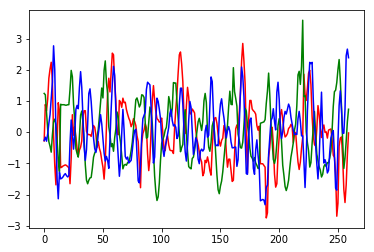

In [19]:
plot_series(X_train[0, :, :])

Can we tell between different people's data by eye?

Let's plot a few series for some different people - say, 5 series for 3 people.

![](three.png)

### The neural network

In [20]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [21]:
# Initiate the model - we'll use a sequential model so we can add to it
model = Sequential()

# Start with a convolutional layer:
#  * filters: The number of "features" we want to learn; number of patterns to try to identify
#  * kernel_size: The "window" to consider, i.e. we look at a rolling window captuiring [kernel_size] time points at once
#  * strides: How many time steps to "roll forward" each time we move the window
#  * activation: The activation function to use; convolutional layers typically use REctified Linear Unit function
#  * input_shape: We're feeding in observations each of shape 260{time points}*3{directional acceleration features}
model.add(Conv1D(filters=40, kernel_size=40, strides=2, activation="relu", input_shape=(260, 3)))
print(model.output_shape)

model.add(MaxPooling1D(pool_size=2))
print(model.output_shape)

# Another convolutional layer: this one finds "meta-patterns" in the patterns the first layer picked up
model.add(Conv1D(filters=40, kernel_size=10, activation="relu"))
print(model.output_shape)

# If the net is too large and computation too slow, we can reduce the number of parameters with max pooling
# This layer would reduce the number of parameters by half by combining ("pooling") parameters
# i.e. parameters get paired up (by position) and the maximum one only is kept
model.add(MaxPooling1D(pool_size=2))
print(model.output_shape)

# We still have a 3-dimensional set of parameters - we need to make this 2-dimensional, so we "flatten"
# (Unstack all the leaves and lay them out next to each other)
model.add(Flatten())
print(model.output_shape)

# We need to finish with a couple of dense layers: one to detect relationships between the (flattened)
# convolutional neurons, and...
model.add(Dense(100, activation="sigmoid"))
print(model.output_shape)

# ... one to present the output as a one-hot vector.
# (We typically use softmax in the very final layer since it provides a "stronger" signal than sigmoid)
model.add(Dense(15, activation="softmax"))
print(model.output_shape)

(None, 111, 40)
(None, 55, 40)
(None, 46, 40)
(None, 23, 40)
(None, 920)
(None, 100)
(None, 15)


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 111, 40)           4840      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 55, 40)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 46, 40)            16040     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 23, 40)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 920)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               92100     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                1515      
Total para

In [23]:
# We have to compile the network before we can run it, defining:
# * Loss function to use (always categorical cross-entropy for multi-class logistic regression)
# * Optimizer to use
#   ("adam" = "ADAptive Movement estimation", but e.g. "sgd" = "Stochastic Gradient Descent" will work, just slower)
# * Metrics to report (NOT used for adjusting parameters - that's what the loss function is for!)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Fit it!
# * X_train and y_train are training data/labels
# * epochs: How many times to pass the training data through and update the network's parameters
# * batch_size: How many observations to include in each batch the optimizer sees
# * Also show us the accuracy for the cross-validation set
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Train on 4075 samples, validate on 1358 samples
Epoch 1/10
4075/4075 [==============================] - 4s 1ms/step - loss: 2.4146 - acc: 0.2491 - val_loss: 1.7235 - val_acc: 0.5619
Epoch 2/10
4075/4075 [==============================] - 4s 906us/step - loss: 1.2023 - acc: 0.7261 - val_loss: 0.8270 - val_acc: 0.8203
Epoch 3/10
4075/4075 [==============================] - 4s 899us/step - loss: 0.6942 - acc: 0.8420 - val_loss: 0.5790 - val_acc: 0.8542
Epoch 4/10
4075/4075 [==============================] - 4s 876us/step - loss: 0.5081 - acc: 0.8778 - val_loss: 0.4487 - val_acc: 0.8991
Epoch 5/10
4075/4075 [==============================] - 4s 885us/step - loss: 0.3806 - acc: 0.9134 - val_loss: 0.3689 - val_acc: 0.9138
Epoch 6/10
4075/4075 [==============================] - 4s 873us/step - loss: 0.2948 - acc: 0.9394 - val_loss: 0.3197 - val_acc: 0.9308
Epoch 7/10
4075/4075 [==============================] - 4s 909us/step - loss: 0.2266 - acc: 0.9600 - val_loss: 0.2675 - val_acc: 0.9345
Ep

At this point we could try to improve that cross-validation accuracy score, e.g. change network structure.

### Reporting

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
y_pred = model.predict_classes(X_test)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       100
          1       0.95      0.82      0.88        87
          2       0.95      0.89      0.92        66
          3       0.98      0.95      0.96       129
          4       0.92      0.97      0.95        63
          5       0.97      0.95      0.96       102
          6       0.86      0.94      0.90        71
          7       0.89      0.87      0.88        83
          8       0.98      0.91      0.94        89
          9       0.96      0.93      0.94        94
         10       0.97      0.99      0.98       102
         11       0.83      0.90      0.86        78
         12       0.97      0.96      0.97       111
         13       0.85      0.98      0.91        86
         14       0.92      0.94      0.93        98

avg / total       0.94      0.93      0.93      1359

[[ 98   0   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0  71   1   0   0   0   0   5

---

## Visualising features

We can try to visualise the "features" of the time series which the convolutional layers of the net have learned to identify.

In [91]:
# Plot the weights from a given layer
def plot_filter(model, layer, k):
    x = model.layers[layer].get_weights()[0][:, :, k]
    plot_series(x)

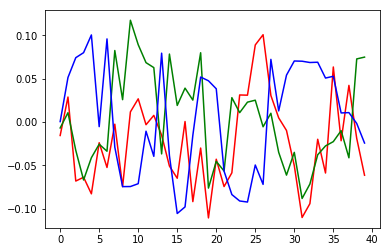

In [93]:
plot_filter(model, 0, 4)

We can also see if there are any patterns in the autocorrelation plots which might suggest strong periodicity.

In [94]:
def plot_filter_corr(model, layer, k):
    weights = model.layers[layer].get_weights()[0][:, :, k]
    corrs = np.apply_along_axis(lambda y: np.correlate(y, y, mode="full"), 0, weights)
    plot_series(corrs[corrs.shape[0]//2:, :])

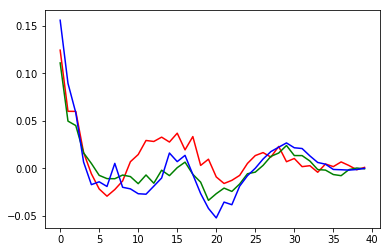

In [95]:
plot_filter_corr(model, 0, 4)

Let's plot each filter with its autocorrelation plot.

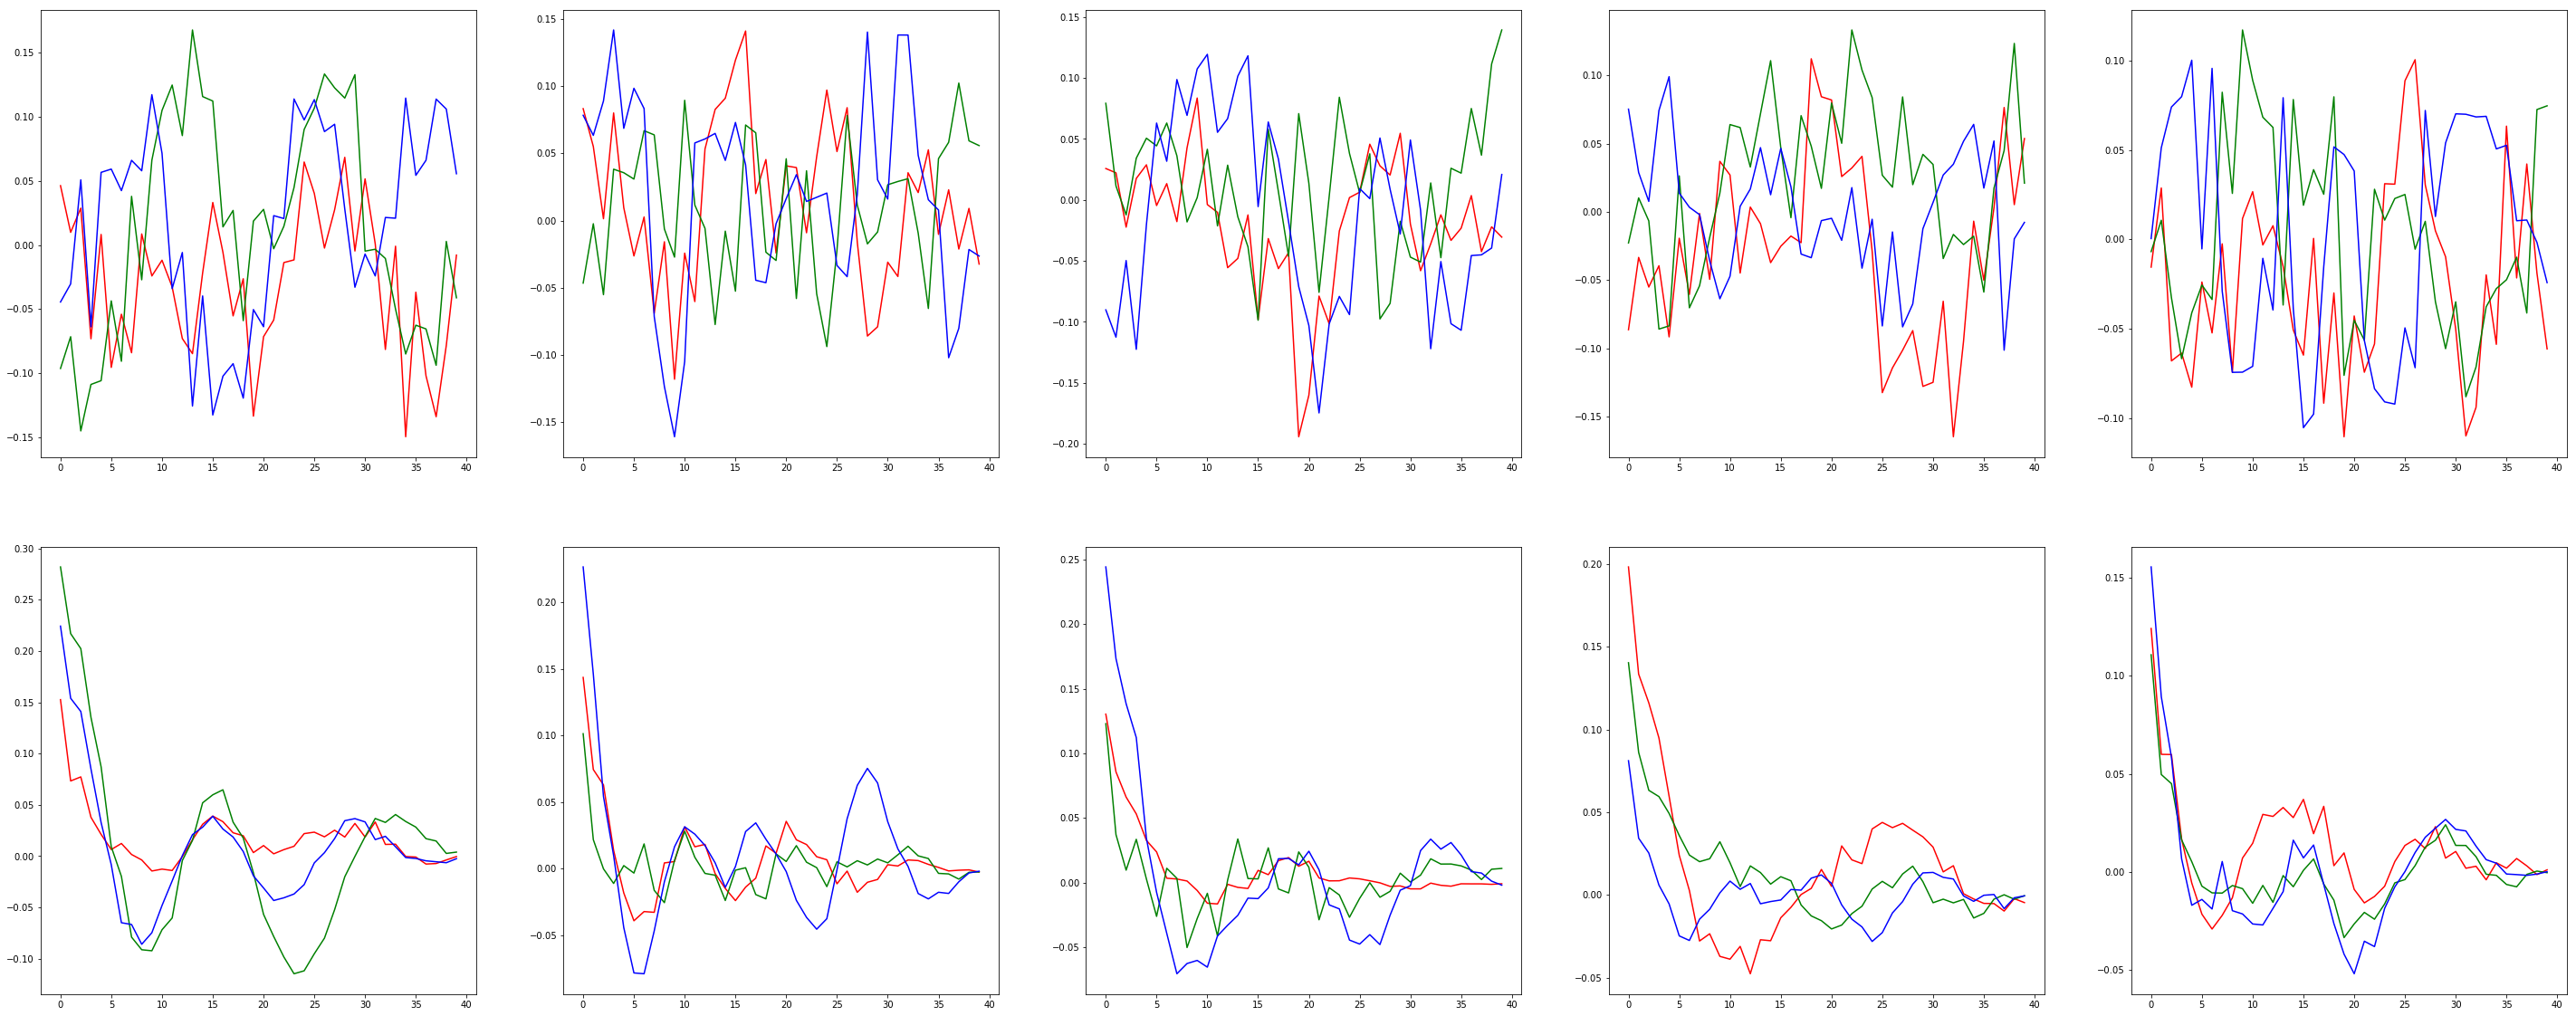

In [97]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(50, 20))

for k in range(5):
    plt.subplot(2, 5, 1+k)
    plot_filter(model, 0, k)
    plt.subplot(2, 5, 6+k)
    plot_filter_corr(model, 0, k)

In [98]:
fig.savefig("corrs.png")